In [2]:
import os
import cv2
import numpy

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
!pwd
!ls
%cd drive/MyDrive/ObjectDetection

/content
drive  sample_data
/content/drive/MyDrive/ObjectDetection


In [14]:
if not os.path.exists('yolov5'):
  !git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

/content/drive/MyDrive/ObjectDetection/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.7/611.7 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00


In [ ]:
!python train.py --data data/custom.yaml --weights yolov5m.pt --epochs 100 --freeze 10 --batch 32

In [ ]:
#############################################
# Simulation showing how text is recognised from a crop
# The code for this is in ocr_recognition.py file almost same as below

In [7]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 2s (2,966 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [8]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import pytesseract
from PIL import Image
from google.colab.patches import cv2_imshow

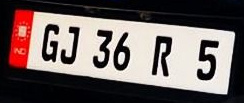

In [41]:

image = cv2.imread('../images/simulation.jpg',)

cv2_imshow(image)

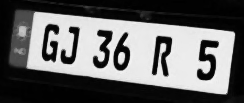

In [29]:
#convert to gray scale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray = cv2.medianBlur(gray,3)

cv2_imshow(gray)


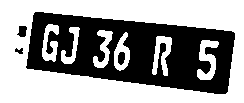

In [30]:
#binary and otsu threshold
thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

cv2_imshow(thresh)

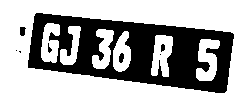

In [31]:
rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

# apply dilation
dilation = cv2.dilate(thresh, rect_kern, iterations = 1)

cv2_imshow(dilation)

In [32]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [33]:
sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

In [43]:
plate_num = ""

for cnt in sorted_contours:
    x,y,w,h = cv2.boundingRect(cnt)
    area_bound = h*w
    height, width = gray.shape
    ratio = h / float(w)

    #Some conditions to remove unneccesary contours.
    if height / float(h) > 6: continue
    if ratio < 0.50: continue
    if width / float(w) > 15: continue
    if area_bound < 100: continue
    if 2*area_bound > height*width: continue

    cv2.rectangle(gray, (x,y), (x+w, y+h), (0,255,0),2)

    lef_y = max(y-2,0)
    rig_y = min(y+h+4,height)
    lef_x = max(x-2,0)
    rig_x = min(x+w+4,width)

    cv2.rectangle(gray, (x,y), (x+w, y+h), (0,255,0),2)
    #Getting the character
    char = thresh[lef_y:rig_y,lef_x:rig_x]
    text = pytesseract.image_to_string(char, lang='eng', config='-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 10 --oem 3')
    plate_num += text.strip()

print(plate_num)

GJ36R5


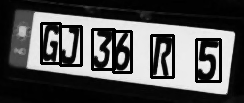

In [56]:
cv2_imshow(gray)